In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from code_utils.utils import aplatir,wg_chap_to_dict,get_wg

Visualization of the contribution of each countries in ipcc references

In [2]:
df_ipcc=pd.read_json(module_path+'\\IPCC_bibliography\\AR6\\structured_data\\data_ipcc_visualization.json')

In [3]:
df_ipcc=df_ipcc.drop_duplicates(subset=['doi','chap','wg'])

In [4]:
df_ipcc['wg_chap']=df_ipcc.apply(lambda row: wg_chap_to_dict(row), axis=1)

In [5]:
df_ipcc=df_ipcc.dropna(subset=['doi']).groupby(['doi']).agg({'wg_chap': lambda x: aplatir(list(x)),'countries':lambda x: list(x)[0]}).reset_index()

In [6]:
color_dict = {
'FR': '#BE2125'
}

In [7]:
data_counts = pd.Series(aplatir(list(df_ipcc['countries']))).value_counts().drop('None')

In [8]:
data_counts

US    19167
GB    10499
DE     6589
AU     6085
CA     4226
      ...  
TM        1
GI        1
NR        1
AX        1
KN        1
Name: count, Length: 225, dtype: int64

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\haallat\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUniIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\haallat\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGeneral.ttf', name='STIXGeneral', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\haallat\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif-Bold.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:f

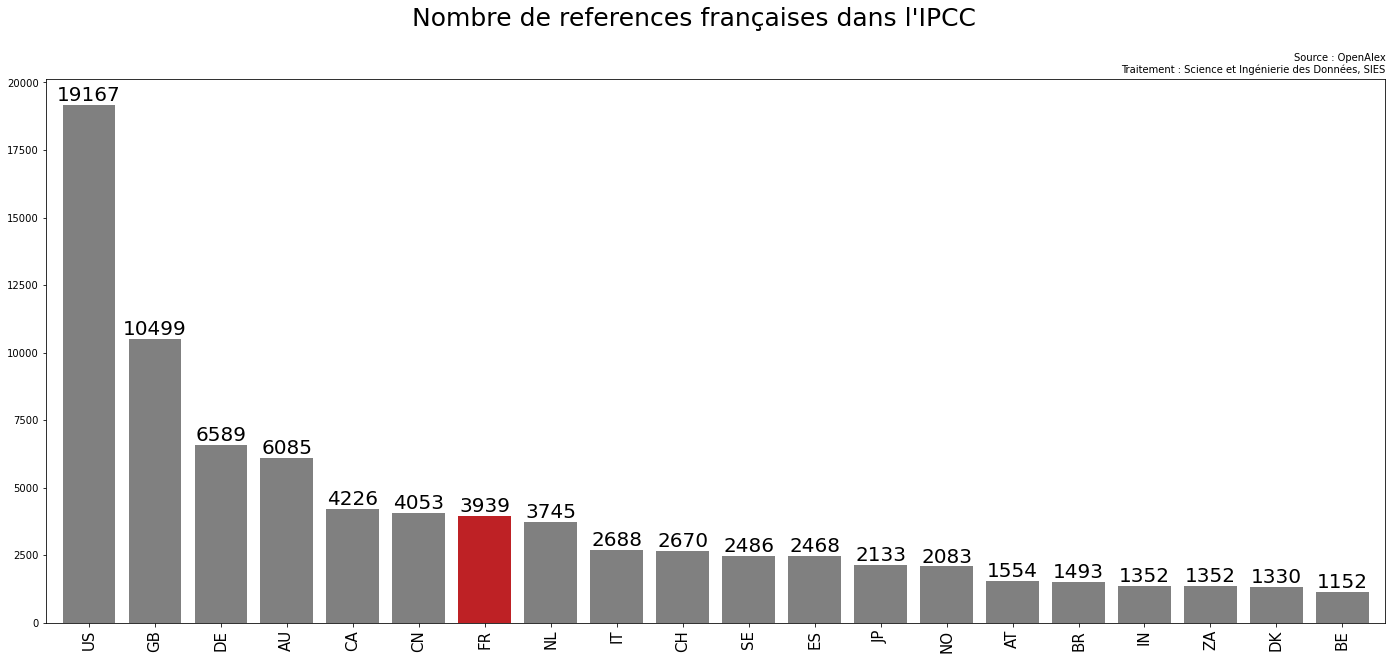

In [9]:
plt.figure(figsize=(24, 10))
ax = data_counts[:20].plot(kind='bar', color=[color_dict.get(u, 'grey') for u in data_counts[:20].index], width=0.8)

for i, v in enumerate(data_counts[:20]):
    ax.text(i, v + 0.1, f'{v}', ha='center', va='bottom', color='black', size=20)
    
plt.suptitle(f"Nombre de references françaises dans l'IPCC", size=25)
plt.title('Source : OpenAlex\nTraitement : Science et Ingénierie des Données, SIES', size=10, loc='right')

ax.set_xticklabels(data_counts.index[:20], rotation='vertical', fontsize=15)
plt.show()

C:\Users\haallat\AppData\Local\Temp\ipykernel_18584\2257069433.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{tick:.1f}%' for tick in ax.get_yticks()], fontsize=15)
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=16.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\haallat\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUniIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\haallat\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGeneral.ttf', name='STIXGeneral', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\haallat\\Anacon

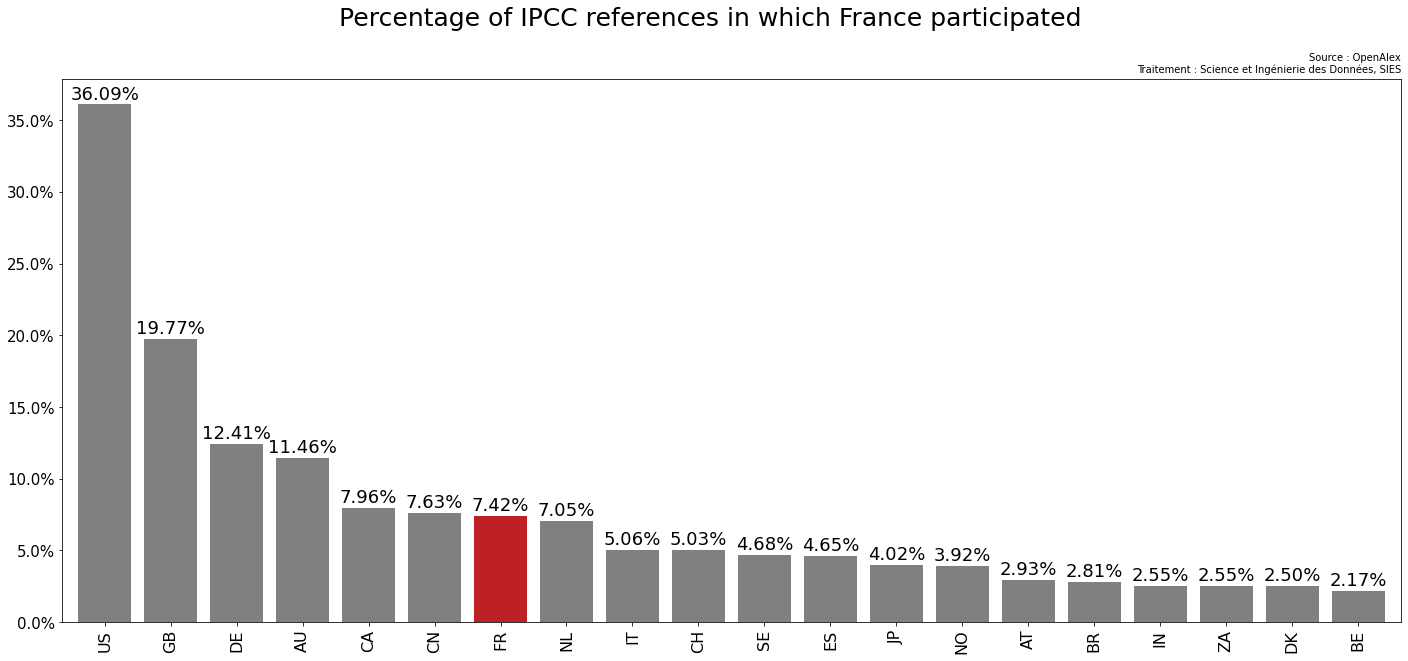

In [10]:
nb_references = len(df_ipcc.doi.dropna().drop_duplicates())
pourcent_data = (data_counts / nb_references) * 100

plt.figure(figsize=(24, 10))
ax = pourcent_data[:20].plot(kind='bar', color=[color_dict.get(u, 'grey') for u in pourcent_data[:20].index], width=0.8)

for i, v in enumerate(pourcent_data[:20]):
    ax.text(i, v + 0.1, f'{v:.2f}%', ha='center', va='bottom', color='black', fontsize=18)

plt.suptitle(f"Percentage of IPCC references in which France participated", size=25)
plt.title('Source : OpenAlex\nTraitement : Science et Ingénierie des Données, SIES', size=10, loc='right')

ax.set_xticklabels(pourcent_data.index[:20], rotation='vertical', fontsize=16)
ax.set_yticklabels([f'{tick:.1f}%' for tick in ax.get_yticks()], fontsize=15)
plt.show()

Visualization of the contribution of each countries in ipcc references - wg1

In [11]:
df_ipcc_chap=df_ipcc
df_ipcc_chap['wgs_bool']=df_ipcc_chap['wg_chap'].apply(lambda x: get_wg(x,wg1=True))
df_ipcc_chap['wgs_bool'].value_counts()

wgs_bool
False    40293
True     12819
Name: count, dtype: int64

In [12]:
dd=df_ipcc.loc[(df_ipcc['wg_chap'].apply(lambda wg_chap: any('2' in x.get('wg', '') for x in wg_chap)))&(df_ipcc['wg_chap'].apply(lambda wg_chap: not any('2_cross' in x.get('wg', '') for x in wg_chap)))]

In [13]:
len(dd)

25568

In [ ]:
dd_fr_wg1=df_ipcc.loc[(df_ipcc['wg_chap'].apply(lambda wg_chap: any('1' in x.get('wg', '') for x in wg_chap)))&(df_ipcc['countries'].apply(lambda countries: not any('FR' in x for x in countries)))]

In [ ]:
len(dd)/len(dd_fr_wg1)

In [ ]:
df_ipcc.loc[(df_ipcc['wg_chap'].apply(lambda wg_chap: any('1' in x.get('wg', '') for x in wg_chap)))&(df_ipcc['wg_chap'].apply(lambda wg_chap: any('2' in x.get('wg', '') for x in wg_chap)))&(df_ipcc['countries'].apply(lambda countries: any('FR' in x for x in countries)))]

In [ ]:
df_ipcc_chap=df_ipcc
df_ipcc_chap
df_ipcc_chap=df_ipcc_chap[df_ipcc_chap.wgs_bool==True]
data_counts = pd.Series(aplatir(list(df_ipcc_chap['countries']))).value_counts().drop('None')

nb_references = len(df_ipcc_chap.doi.dropna().drop_duplicates())
pourcent_data = (data_counts / nb_references) * 100

plt.figure(figsize=(24, 10))
ax = pourcent_data[:20].plot(kind='bar', color=[color_dict.get(u, 'grey') for u in pourcent_data[:20].index], width=0.8)

for i, v in enumerate(pourcent_data[:20]):
    ax.text(i, v + 0.1, f'{v:.2f}%', ha='center', va='bottom', color='black', fontsize=18)

plt.suptitle(f"Percentage of IPCC references (Working Group 1) in which France participated", size=25)
plt.title('Source : OpenAlex\nTraitement : Science et Ingénierie des Données, SIES', size=10, loc='right')

ax.set_xticklabels(pourcent_data.index[:20], rotation='vertical', fontsize=16)
ax.set_yticklabels([f'{tick:.1f}%' for tick in ax.get_yticks()], fontsize=15)
plt.show()

Visualization of the contribution of each countries in ipcc references - wg2

C:\Users\haallat\AppData\Local\Temp\ipykernel_18584\830921506.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{tick:.1f}%' for tick in ax.get_yticks()], fontsize=15)


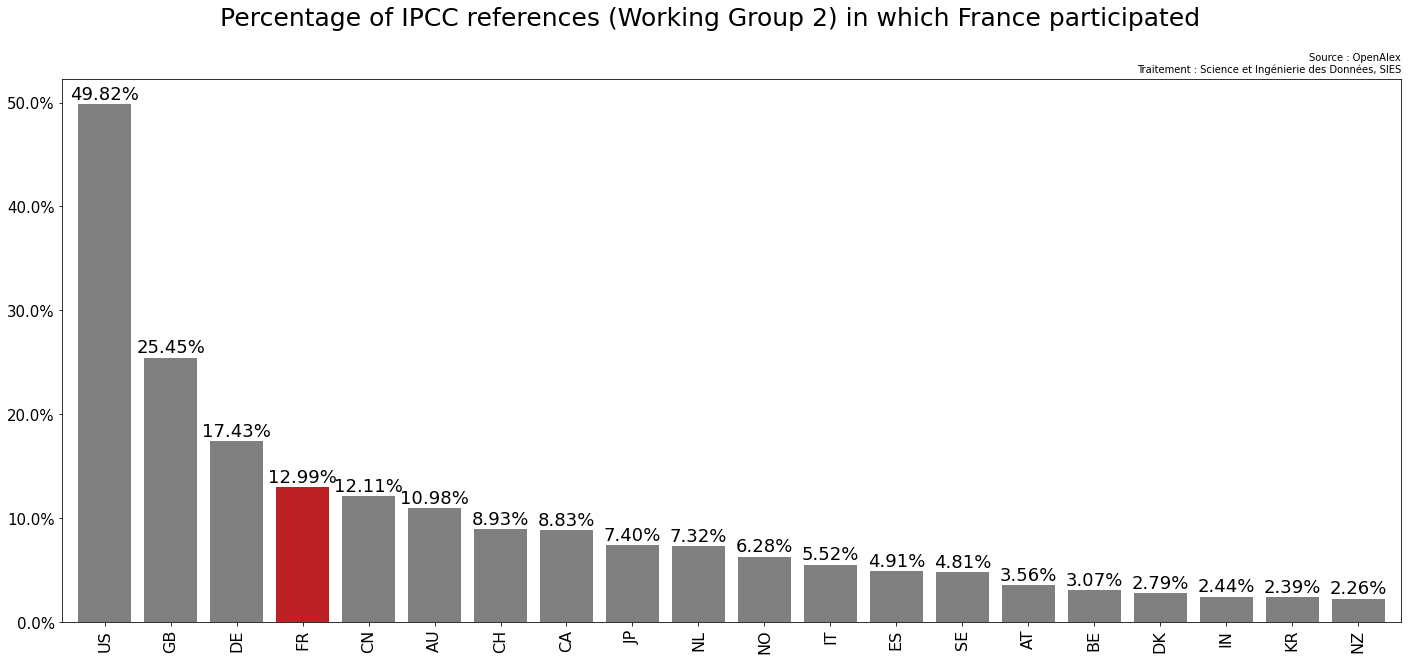

In [14]:
df_ipcc_chap=df_ipcc
df_ipcc_chap['wgs_bool']=df_ipcc_chap['wg_chap'].apply(lambda x: get_wg(x,wg1=True))
df_ipcc_chap=df_ipcc_chap[df_ipcc_chap.wgs_bool==True]
data_counts = pd.Series(aplatir(list(df_ipcc_chap['countries']))).value_counts().drop('None')

nb_references = len(df_ipcc_chap.doi.dropna().drop_duplicates())
pourcent_data = (data_counts / nb_references) * 100

plt.figure(figsize=(24, 10))
ax = pourcent_data[:20].plot(kind='bar', color=[color_dict.get(u, 'grey') for u in pourcent_data[:20].index], width=0.8)

for i, v in enumerate(pourcent_data[:20]):
    ax.text(i, v + 0.1, f'{v:.2f}%', ha='center', va='bottom', color='black', fontsize=18)

plt.suptitle(f"Percentage of IPCC references (Working Group 2) in which France participated", size=25)
plt.title('Source : OpenAlex\nTraitement : Science et Ingénierie des Données, SIES', size=10, loc='right')

ax.set_xticklabels(pourcent_data.index[:20], rotation='vertical', fontsize=16)
ax.set_yticklabels([f'{tick:.1f}%' for tick in ax.get_yticks()], fontsize=15)
plt.show()

Visualization of the contribution of each countries in ipcc references - wg2 cross chapters

In [ ]:
df_ipcc_chap=df_ipcc

In [ ]:
df_ipcc_chap['wg_chap'].apply(lambda x: get_wg(x,wg2_cross=True))

In [ ]:
df_ipcc_chap=df_ipcc
df_ipcc_chap['wgs_bool']=df_ipcc_chap['wg_chap'].apply(lambda x: get_wg(x,wg2_cross=True))
df_ipcc_chap=df_ipcc_chap[df_ipcc_chap.wgs_bool==True]
data_counts = pd.Series(aplatir(list(df_ipcc_chap['countries']))).value_counts().drop('None')

nb_references = len(df_ipcc_chap.doi.dropna().drop_duplicates())
pourcent_data = (data_counts / nb_references) * 100

plt.figure(figsize=(24, 10))
ax = pourcent_data[:20].plot(kind='bar', color=[color_dict.get(u, 'grey') for u in pourcent_data[:20].index], width=0.8)

for i, v in enumerate(pourcent_data[:20]):
    ax.text(i, v + 0.1, f'{v:.2f}%', ha='center', va='bottom', color='black', fontsize=18)

plt.suptitle(f"Percentage of IPCC references (Working Group 2 cross chapters) in which France participated", size=25)
plt.title('Source : OpenAlex\nTraitement : Science et Ingénierie des Données, SIES', size=10, loc='right')

ax.set_xticklabels(pourcent_data.index[:20], rotation='vertical', fontsize=16)
ax.set_yticklabels([f'{tick:.1f}%' for tick in ax.get_yticks()], fontsize=15)
plt.show()

Visualization of the contribution of each countries in ipcc references - wg3

In [ ]:
df_ipcc=pd.read_json(module_path+'\\IPCC_bibliography\\AR6\\structured_data\\bso_ipcc_ipbes.jsonl',lines=True)
df_ipcc2=df_ipcc.dropna(subset=['ipbes'])

In [ ]:
df_ipcc_chap=df_ipcc2.loc[(df_ipcc2['ipcc'].apply(lambda wg_chap: any('3' in x.get('wg', '') for x in wg_chap)))]
data_counts = pd.Series(aplatir(list(df_ipcc_chap['countries'].dropna()))).value_counts()

nb_references = len(df_ipcc_chap)
pourcent_data = (data_counts / nb_references) * 100

plt.figure(figsize=(24, 10))
ax = pourcent_data[:20].plot(kind='bar', color=[color_dict.get(u, 'grey') for u in pourcent_data[:20].index], width=0.8)

for i, v in enumerate(pourcent_data[:20]):
    ax.text(i, v + 0.1, f'{v:.2f}%', ha='center', va='bottom', color='black', fontsize=18)

plt.suptitle(f"Percentage of IPCC references (Working Group 3) in which France participated", size=25)
plt.title('Source : OpenAlex\nTraitement : Science et Ingénierie des Données, SIES', size=10, loc='right')

ax.set_xticklabels(pourcent_data.index[:20], rotation='vertical', fontsize=16)
ax.set_yticklabels([f'{tick:.1f}%' for tick in ax.get_yticks()], fontsize=15)
plt.show()